21.663185378590075


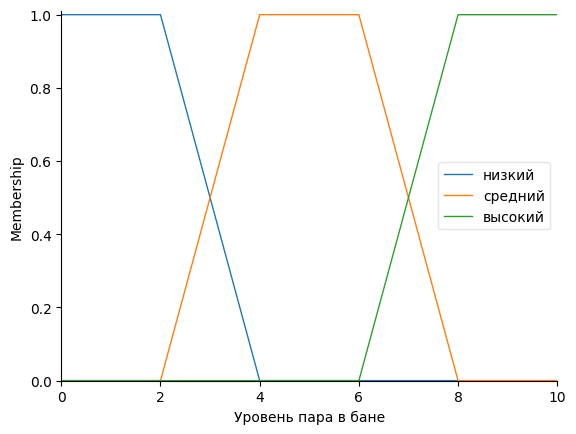

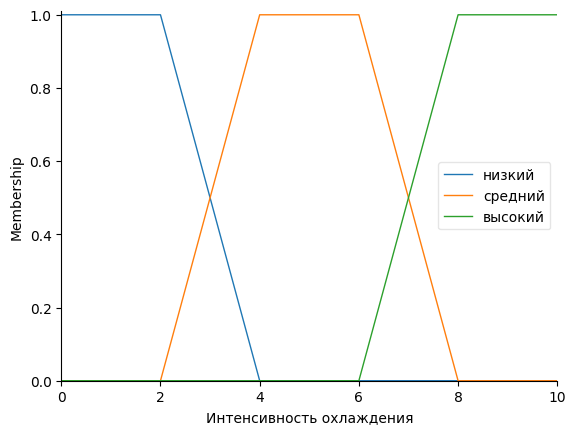

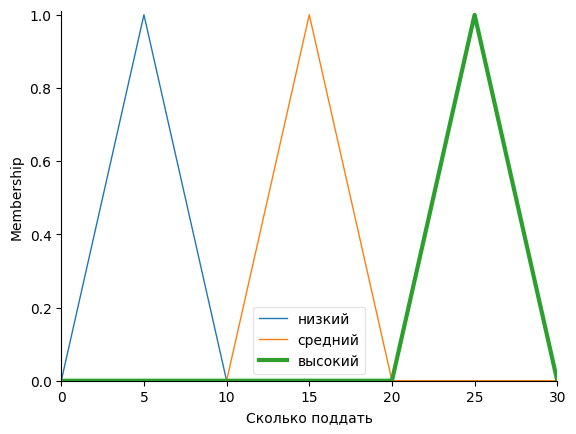

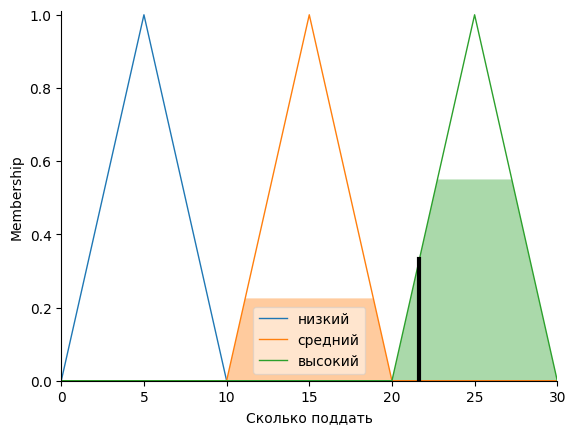

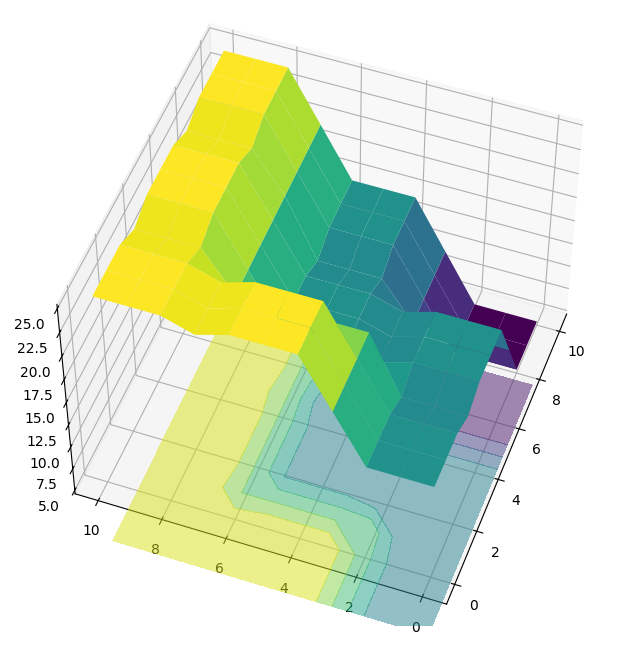

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

STEAM_LEVEL_NAME = 'Уровень пара в бане'
COOLING_INTENSITY_NAME = 'Интенсивность охлаждения'
CHARGE_NAME = 'Сколько поддать'

LEVEL_LOW = 'низкий'
LEVEL_MEDIUM = 'средний'
LEVEL_HIGH = 'высокий'

steam_level = ctrl.Antecedent(np.arange(0, 11, 1), STEAM_LEVEL_NAME)
cooling_intensity = ctrl.Antecedent(np.arange(0, 11, 1), COOLING_INTENSITY_NAME)
charge = ctrl.Consequent(np.arange(0, 31, 1), CHARGE_NAME)

steam_level[LEVEL_LOW] = fuzz.zmf(steam_level.universe, 2, 4)
steam_level[LEVEL_MEDIUM] = fuzz.trapmf(steam_level.universe, [2, 4, 6, 8])
steam_level[LEVEL_HIGH] = fuzz.smf(steam_level.universe, 6, 8)

cooling_intensity[LEVEL_LOW] = fuzz.zmf(cooling_intensity.universe, 2, 4)
cooling_intensity[LEVEL_MEDIUM] = fuzz.trapmf(cooling_intensity.universe, [2, 4, 6, 8])
cooling_intensity[LEVEL_HIGH] = fuzz.smf(cooling_intensity.universe, 6, 8)

charge[LEVEL_LOW] = fuzz.trimf(charge.universe, [0, 5, 10])
charge[LEVEL_MEDIUM] = fuzz.trimf(charge.universe, [10, 15, 20])
charge[LEVEL_HIGH] = fuzz.trimf(charge.universe, [20, 25, 30])

steam_level.view()
cooling_intensity.view()
charge[LEVEL_HIGH].view()

rule1 = ctrl.Rule(steam_level[LEVEL_LOW] & cooling_intensity[LEVEL_HIGH], charge[LEVEL_HIGH])
rule2 = ctrl.Rule(steam_level[LEVEL_LOW] & cooling_intensity[LEVEL_MEDIUM], charge[LEVEL_HIGH])
rule3 = ctrl.Rule(steam_level[LEVEL_LOW] & cooling_intensity[LEVEL_LOW], charge[LEVEL_MEDIUM])

rule4 = ctrl.Rule(steam_level[LEVEL_MEDIUM] & cooling_intensity[LEVEL_HIGH], charge[LEVEL_HIGH])
rule5 = ctrl.Rule(steam_level[LEVEL_MEDIUM] & cooling_intensity[LEVEL_MEDIUM], charge[LEVEL_MEDIUM])
rule6 = ctrl.Rule(steam_level[LEVEL_MEDIUM] & cooling_intensity[LEVEL_LOW], charge[LEVEL_MEDIUM])

rule7 = ctrl.Rule(steam_level[LEVEL_HIGH] & cooling_intensity[LEVEL_HIGH], charge[LEVEL_HIGH])
rule8 = ctrl.Rule(steam_level[LEVEL_HIGH] & cooling_intensity[LEVEL_MEDIUM], charge[LEVEL_MEDIUM])
rule9 = ctrl.Rule(steam_level[LEVEL_HIGH] & cooling_intensity[LEVEL_LOW], charge[LEVEL_LOW])

charge_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

charging = ctrl.ControlSystemSimulation(charge_ctrl)

charging.input[STEAM_LEVEL_NAME] = 2.45
charging.input[COOLING_INTENSITY_NAME] = 6.9

charging.compute()

print(charging.output[CHARGE_NAME])

charge.view(sim=charging)

upsampled = np.arange(0, 11, 1)

x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(11):
    for j in range(11):
        charging.input[STEAM_LEVEL_NAME] = x[i, j]
        charging.input[COOLING_INTENSITY_NAME] = y[i, j]
        charging.compute()
        z[i, j] = charging.output[CHARGE_NAME]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)

ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
ax.contourf(x, y, z, zdir='x', offset=30, cmap='viridis', alpha=0.5)
ax.contourf(x, y, z, zdir='y', offset=30, cmap='viridis', alpha=0.5)

ax.view_init(50, 200)
